# Описание проекта

Компания, разработавшая приложение X, терпит убытки, несмотря на огромные вложения в рекламу.

**Цель этого проекта - разобраться в причинах и помочь компании выйти в плюс.**
В коцне выделим причины неэффективности привлечения пользователей и сформулируеим рекомендации для отдела маркетинга.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
* лог сервера с данными об их посещениях,
* выгрузка их покупок за этот период,
* рекламные расходы.


В ходе работы необходимо ответить на следующие вопросы:
* откуда приходят пользователи и какими устройствами они пользуются,
* сколько стоит привлечение пользователей из различных рекламных каналов;
* сколько денег приносит каждый клиент,
* когда расходы на привлечение клиента окупаются,
* какие факторы мешают привлечению клиентов.



# Изучим общую информацию о данных

In [1]:
#подключаем бтблиотеки
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
#импортируем данные
try:
    visits, orders, costs = (
        pd.read_csv('/datasets/visits_info_short.csv'),
        pd.read_csv('/datasets/orders_info_short.csv'),
        pd.read_csv('/datasets/costs_info_short.csv')
    )
except:
    visits, orders, costs = (
        pd.read_csv('C:/Users/Lagkueva/Downloads/visits_info_short.csv'),
        pd.read_csv('C:/Users/Lagkueva/Downloads/orders_info_short.csv'),
        pd.read_csv('C:/Users/Lagkueva/Downloads/costs_info_short.csv')
    )
    

In [4]:
visits.head(10)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [6]:
orders.head(20)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


In [7]:
orders.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [8]:
costs.head(20)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


In [9]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


* В таблице **Visits** 6 столбцов по 309901 записей. Тип данных в столбцах **Session Start** и **Session End** необходимо заменить на **datetime**. 
* В таблице **Orders** 3 столбца по 40212 записей, заменим тип данных в стобце **Event Dt**. 
* В таблице **Costs** 3 столбца по 1800 записей, тип данных **dt** заменим на **datetime**. 
* Также следует привести все названия столбцов к нижнему регистру. Количество значений в столбцах таблиц не различается, пропусков нет. 

**Вывод**

В нашем распоряжении три таблицы. Таблица **Visits** содержит данные о пользователях - страна пользователя, тип устройства, канал привлечения, а также начало и конец пользовательской сессии. В **Orders** содержатся данные о покупках, а именно - номер пользователя, вемя совершения покупки и сумма заказа. Таблица **Costs** содержит данные о рекламе - дата проведения рекламной кампании, идентификатор рекламного источника, расходы на рекламную кампанию.

# Предобработка данных

In [10]:
df_list = [visits, orders, costs]

for df in df_list:           #приводим названия к нижнему регистру
    df.columns = df.columns.str.lower()

In [11]:
visits.rename(columns={'user id':'user_id', 'session start' : 'session_start', 'session end':'session_end'}, inplace=True)
orders.rename(columns={'user id':'user_id', 'event dt':'event_dt'}, inplace=True) #переименовываем некоторые столбцы

In [12]:
visits['session_start'] = pd.to_datetime(visits['session_start']) #заменяем типы данных
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date


In [13]:
for df in df_list:
    print(df.isna().sum())

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64
user_id     0
event_dt    0
revenue     0
dtype: int64
dt         0
channel    0
costs      0
dtype: int64


In [14]:
for df in df_list:
    print(df.duplicated().sum())

0
0
0


**На этом этапе:**
* Были заменены названия столбцов
* Аномальные значения не выявлены
* Пропусков в данных нет
* Были заменены типы данных в некоторых столбцах

## Аномальные значения

<Axes: title={'center': 'Диаграмма размаха Costs'}, xlabel='costs'>

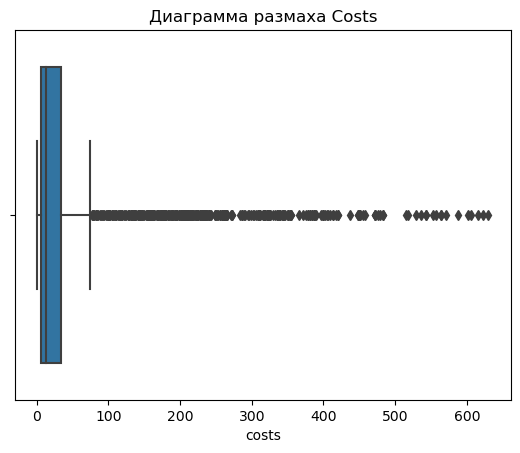

In [21]:
plt.title("Диаграмма размаха Costs")
sns.boxplot(x = costs['costs'])

In [22]:
costs['costs'].describe()

count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64

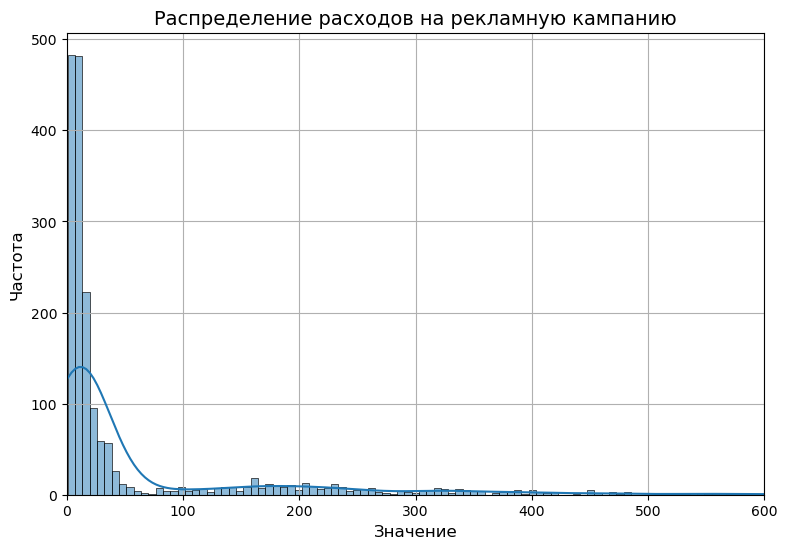

In [24]:
# назначаем размер графика
plt.figure(figsize=(9, 6))

# строим гистограмму для столбца costs, добавив график кривой KDE
sns.histplot(x=costs['costs'], kde=True, bins=100)

# ограничиваем ось X для наглядности
plt.xlim(0, 600)
# указываем заголовок графика и подписи осей средствами matplotlib
plt.title('Распределение расходов на рекламную кампанию', fontsize=14)
plt.xlabel('Значение', fontsize=12)
plt.ylabel('Частота', fontsize=12)

# добавляем сетку
plt.grid()
# отображаем график на экране
plt.show()

In [25]:
q_25 = costs['costs'].quantile(0.25)
q_75 = costs['costs'].quantile(0.75)
lower = q_25 - 1.5*(q_75-q_25)
upper = q_75 + 1.5*(q_75-q_25)
q_25, q_75, lower, upper

(6.495, 33.6, -34.1625, 74.2575)

In [41]:
costs.query('costs > @q_75').describe()

,costs
count,447.000000
mean,202.850895
std,137.600971
min,34.200000
25%,91.850000
50%,180.400000
75%,286.000000
max,630.000000


Распределение расходов на рекламу явно асимметрично, видим тяжелый правый хвост. Мы не можем выбросить эти значения из датасета, так как их общее количество - 447 значений, что составляет почти 25% от общего обьема данных.

# Исследовательский анализ

**Изучим датасеты, чтобы получить более точную информацию о данных**

## **visits**

1. Как меняется количество пользоавтелей с течением времени?
2. Сколько в среднем длится сессия?

array([[<Axes: title={'center': 'user_id'}>,
        <Axes: title={'center': 'session_start'}>],
       [<Axes: title={'center': 'session_end'}>, <Axes: >]], dtype=object)

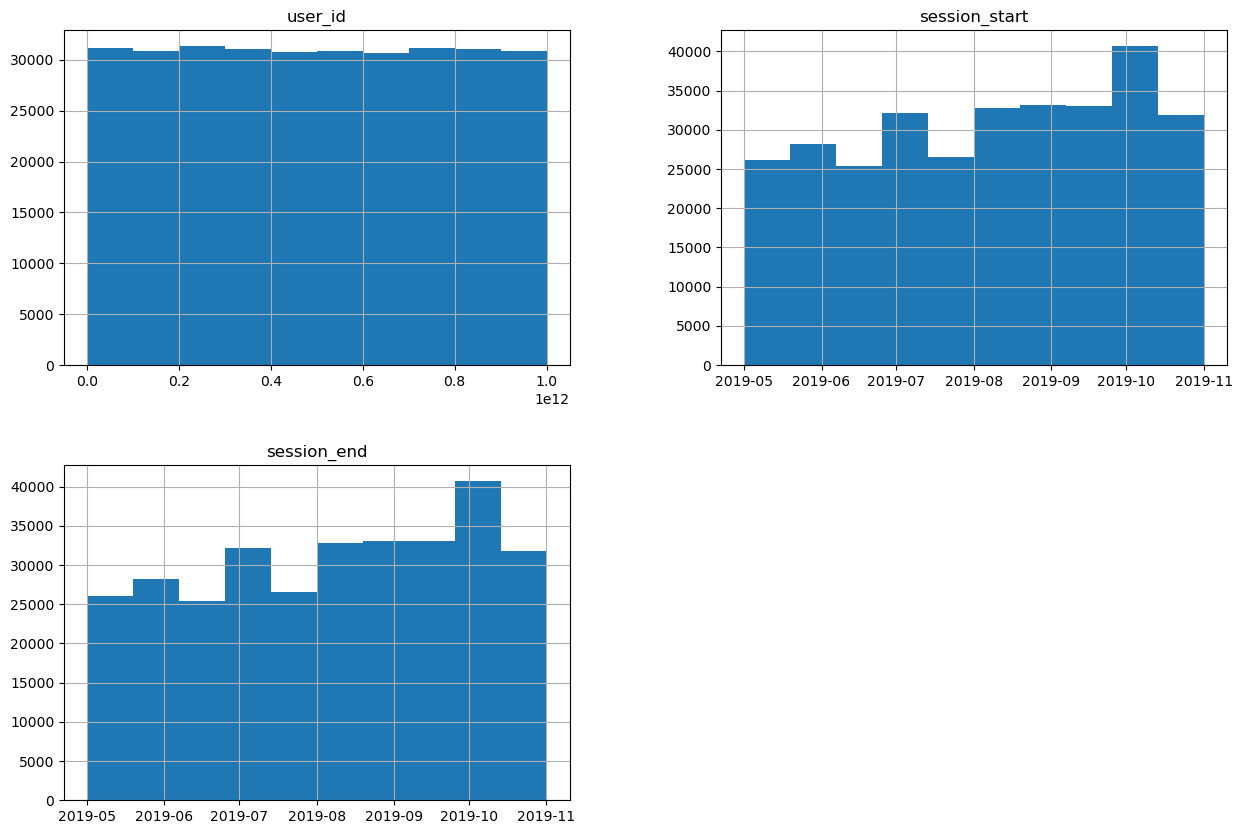

In [26]:
visits.hist(figsize=(15, 10))

In [47]:
visits['session_start_year'] = visits['session_start'].dt.year
visits['session_start_month'] = visits['session_start'].dt.month

visits.groupby(['session_start_year', 'session_start_month']).agg(
    {'user_id': ['count', 'nunique']}
)


user_id        
                                         count nunique
session_start_year session_start_month                
2019               5                     45765   27111
                   6                     44623   26042
                   7                     47970   26672
                   8                     55996   31064
                   9                     56628   31871
                   10                    58919   31175

In [48]:
visits['duration_session'] = (
    visits['session_end'] - visits['session_start']
)
print(visits['duration_session'].dt.seconds)

0          540
1           64
2         4963
3         1466
4         1445
          ... 
309896    4277
309897    1484
309898      43
309899      21
309900    3561
Name: duration_session, Length: 309901, dtype: int64


In [52]:
print(f'Средняя длительность сессии: {visits.duration_session.dt.seconds.mean()} секунд\nЧаще всего сессия длится: {visits.duration_session.dt.seconds.median()} секунд')

Средняя длительность сессии: 1800.0908677287264 секунд
Чаще всего сессия длится: 1244.0 секунд


In [54]:
print(f'Средняя длительность сессии: {visits.duration_session.dt.seconds.mean()/60} минут\nЧаще всего сессия длится: {visits.duration_session.dt.seconds.median()/60} минут')

Средняя длительность сессии: 30.00151446214544 минут
Чаще всего сессия длится: 20.733333333333334 минут


**Таким образом** с течением времени растет количество новых пользователей и сессий. В среднем сессия длится около 30 минут, наиболее распространо значение равно 20 минутам

## **orders**

1. Как меняется выручка в течение времени (дни/месяцы)?
2. Какие товары самые популярные?

In [30]:
orders

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


In [31]:
orders['revenue'].unique()


array([ 4.99,  5.99,  9.99, 49.99, 19.99])

In [32]:
orders.groupby('revenue')['user_id'].count().sort_values()


revenue
19.99      204
49.99      212
9.99       385
5.99       780
4.99     38631
Name: user_id, dtype: int64

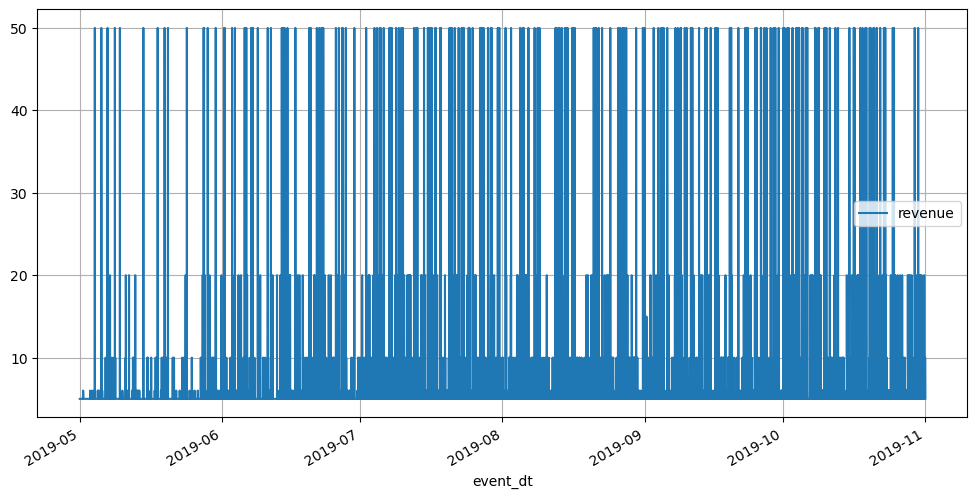

In [33]:
(
    orders.pivot_table(index=orders.event_dt.astype('datetime64[D]'), values='revenue', aggfunc='sum').plot(grid=True, figsize=(12, 6))
)
plt.show()



**Мы можем сделать вывод о том, что** нам предоставлены данные о пяти товарах, самый популярный из них за 4,99 - 38631 шт, наименее популярен продукт стоимостью 19.99 - всего 204 шт. Выручка с течением времени растет.


## **costs**


1. Какой рекламный источник наиболее популярен и сколько денег потрачено на каждый?

In [34]:
costs.groupby('channel')['costs'].count().sort_values()

channel
AdNonSense            180
FaceBoom              180
LeapBob               180
MediaTornado          180
OppleCreativeMedia    180
RocketSuperAds        180
TipTop                180
WahooNetBanner        180
YRabbit               180
lambdaMediaAds        180
Name: costs, dtype: int64

In [35]:
costs.groupby('channel')['costs'].sum().sort_values().reset_index() 

,channel,costs
0,YRabbit,944.22
1,MediaTornado,954.48
2,lambdaMediaAds,1557.60
3,LeapBob,1797.60
4,RocketSuperAds,1833.00
5,OppleCreativeMedia,2151.25
6,AdNonSense,3911.25
7,WahooNetBanner,5151.00
8,FaceBoom,32445.60
9,TipTop,54751.30


**Вывод:** Комапния использовала 10 рекламных источников, каждый по 180 раз. Из них дороже всего обошелся TipTop - 54751, что состовляет примерно половину от общего бюджета.

# Анализ бизнес-показателей

**Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.**

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

**Создадим профили**

In [ ]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

**Считаем Retention Rate**

In [ ]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time
        

**Считаем конверсию**

In [ ]:
def get_conversion(
    profiles,
    purchases,  # заменили sessions
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
        # исключаем пользователей, не «доживших» до горизонта анализа
    
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw  = profiles.query('dt <= @last_suitable_acquisition_date')
    
     # Найдем дату и время первой покупки для каждого пользователя
        
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )
    # Добавим данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # Рассчитаем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # Шаг 5. Построить таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )

        # Считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)

        # Вычислим размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # Объединим таблицы размеров когорт и конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Шаг 9. Разделить каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)

        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

**Рассчитаем LTV**, чтобы получить общую сумму денег, которую один клиент в среднем приносит
компании со всех своих покупок

In [ ]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
# сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi
    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [ ]:
 # функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [ ]:
def plot_retention(retention, retention_history, horizon, window=7):

    plt.figure(figsize=(15, 10))
    retention = retention.drop(columns=['cohort_size', 0])
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в первой ячейке строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [ ]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    plt.figure(figsize=(15, 5))
    conversion = conversion.drop(columns=['cohort_size'])
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [ ]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    cac_history = roi_history[['cac']]
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

**Исследовательский анализ данных**

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

**Составим профили пользователей**

In [ ]:
profiles = get_profiles(visits, orders, costs) 


In [ ]:
print(f'Минимальная дата привлечения пользователей {profiles.first_ts.dt.date.min()}') 
print(f'Максимальная дата привлечения пользователей {profiles.first_ts.dt.date.max()}') 

In [ ]:
#страны пользователей
profiles['region'].unique()


In [ ]:
users_region = profiles.groupby('region')[['user_id', 'payer']].agg({'user_id':'count', 'payer':'sum'})
users_region['rate'] = users_region['payer'] / users_region['user_id']

users_region

In [ ]:
users_region.plot(grid=True, kind='bar', color = 'blue', legend=None)
plt.xlabel('Страны')
plt.ylabel('Количество пользователей')
plt.show()

In [ ]:
#Какими устройствами пользуются посетители?
profiles['device'].unique()


In [ ]:
users_device = profiles.groupby('device')[['device', 'payer']].agg({'device':'count', 'payer':'sum'})
users_device['rate'] = users_device['payer'] / users_device['device']

users_device

In [ ]:
users_device.plot(grid=True, kind='bar', color = 'blue', legend=None)
plt.xlabel('Устройства')
plt.ylabel('Количество пользователей')
plt.show()

In [ ]:
#Изучите рекламные источники привлечения 
profiles['channel'].unique()


In [ ]:
users_channel = profiles.groupby('channel')[['channel', 'payer']].agg({'channel':'count', 'payer':'sum'})
users_channel['rate'] = users_channel['payer'] / users_channel['channel']

users_channel

In [ ]:
users_channel.plot(grid=True, kind='bar', color = 'blue', legend=None)
plt.xlabel('Каналы')
plt.ylabel('Количество пользователей')
plt.show()

**Были составлены профили пользователей, из чего можно сдлеать вывод:**
1. Минимальная дата привлечения пользователей - 1 мая 2019 года, максимальная - 27 октября 2019 года
2. Пользователи приходят из США, Германии, Франции и Соединенного Королевства. Больше всего пользователей приходится на США - более 100 тысяч человек, почти 7000 из которых платят. 
3. Пользователи используют следующие устройства - Mac, PC, iPhone и Android. Наиболее популярны айфоны.
4. Кроме органического трафика "organic", мы имеем 10 рекламных источников. Наиболее популярен среди пользователей 'organic' - 57 тыс. человек. Среди рекламных источников более эффективны каналы FaceBoom и TipTop.


**Маркетинг**

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [ ]:
costs['costs'].sum()

In [ ]:
costs

In [ ]:
costs_channel = costs.pivot_table(index='channel',values='costs',aggfunc='sum').sort_values(by='costs', ascending=False)
costs_channel['percent'] = round((costs_channel['costs'] * 100)/costs['costs'].sum(), 2)

costs_channel


In [ ]:
costs_channel.plot(grid=True, kind='bar', color = 'pink', legend=None, figsize=(10, 5))
plt.xlabel('Каналы')
plt.ylabel('Количество пользователей')
plt.show()

In [ ]:
costs['costs_week'] = costs['dt'].astype('datetime64[W]')
costs['costs_month'] = costs['dt'].astype('datetime64[M]')

In [ ]:
costs.pivot_table(
    index=costs['costs_week'],
    values='costs',
    aggfunc='sum',
    columns='channel'
).plot()


In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))

(costs
 .pivot_table(
    index=costs['costs_week'],
    values='costs',
    aggfunc='sum',
    columns='channel'
)
 .plot(ax=ax, stacked=True)
)

ax.set_xlabel(' ')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))

(costs
 .pivot_table(
    index=costs['costs_month'],
    values='costs',
    aggfunc='sum',
    columns='channel'
)
 .plot(ax=ax, stacked=True)
)

ax.set_xlabel(' ')
plt.show()

In [ ]:
costs_channel = costs.groupby('costs_month')['costs'].sum().reset_index()
costs_channel

In [ ]:
month_lst = ['Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь']

ax = sns.barplot(x='costs_month', y='costs', data=costs_channel, color='blue')
ax.set_xticklabels(month_lst, rotation=45)
plt.title('Расходы помесячно')
ax.set_xlabel('Месяцы')
ax.set_ylabel('Расходы')
plt.grid()
plt.show()

In [ ]:
profiles.groupby('channel')['acquisition_cost'].agg('mean').sort_values(ascending = False)

In [ ]:
# строим график истории изменений CAC по каналам привлечения

cac = profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))

plt.show()

**Вывод**
1. Расходы на маркетинг составили более 105497 тыс
2. Больше всего потратили на источники TipTop и FaceBoom  54751 и 32445 тысяч соответсвенно 
3. Была построена визуализация динамики изменения расходов во времени. Мы выяснили, что расходы на источники TipTop, LeapBop и YRabbit со временем выросли. Больше всего денег на рекламу было потрачено в сентябре 2019 года.
4. Дороже всего обошлись клиенты, привлеченные каналом TipTop.

**Оценим окупаемость рекламы**

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Будем считать, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Построим и изучим графики конверсии и удержания.
- Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответим на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?



***Затраты на привлечение органических пользователей нулевые, поэтому они всегда окупаются. А раз так, исключим их.***

In [ ]:
profiles = profiles.query('channel != "organic"') 

In [ ]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14 #горизонт 

In [ ]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**Вывод**
1. Реклама не окупается
2. Стоимость привлечения клиента растет 
3. Инвестиции не окупаются 
4. График динамики ROI показывает, что с июля клиенты не окупаются

In [ ]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Вывод**
1. LTV имеет хороший показатель со всеми устройствами
2. Стоимость привлечения пользователей также растет. Лидеры тут iPhone и Mac.
3. Реклама PC окупается уже к 11-12 дню. Показатели других устройств хуже. Динамика ROI у Android и iPhone стремительно снижается уже к концу июня.
4. Для большинства устройств проблемы начались с июня, худший показатель у Mac и iPhone. На PC клиенты перестают окупаться с июля.

In [ ]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Вывод**
1. LTV имеет хороший показатель во всех странах 
2. Стоимость привлечения пользователей растет в США уже с июня. В остальных странах показатели с этого месяца падают.
3. К 6 дню окупается реклама во всех странах. В США реклама не окупилась даже за 14 дней.
4. Инвестиции окупаются во всех странах, кроме США, там проблемы начинаются с июня.

In [ ]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Вывод**
1. Наилучший показатель LTV имеют источники **LambdaMediaAds и TipTop**.
2. Стоимость привлечения пользователей растет в **TipTop** уже с июня и имеет ступенчатый вид. CAC остальных источников очень низкий.
3. К 2 дню окупается реклама с источниками **YRabbit, MediaTornado, lambdaMediaAds, RocketSuperAds и LeapBob**. В трех источниках, а именно **AdNoneSence, FaceBoom и TipTop** реклама не окупилась даже за 14 дней.


In [ ]:
 (profiles.pivot_table(index='channel', columns='region', aggfunc={'user_id': 'count'})
  .sort_values(by=('user_id', 'United States'), ascending=False)).fillna(0).style

Источники связаны с разными странами. Мы видим, что первые пято из них ориентированы только на покупателей из США. Остальные болеее-менее равномерно распределены между странами Европы. 

**Промежуточный вывод**
Как было выяснено ранее - наиболее часто в США исполюзуются и финансируются рекламные источники **TipTop и FaceBoom, но именно они имеют наихудшие показатели** окупаемости. Европейский канал **AdNonSense** также имеет плохие показатели.

***Исследуем их более подробно - посмотрим на конверсию и удержание.***

In [ ]:
channel_analysis = ['TipTop', 'FaceBoom', 'AdNonSense'] 
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('channel in @channel_analysis'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Наилучший показатель конверсии у FaceBoom, но в целом динамика слабая у всех каналов.

In [ ]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Пользователи **FaceBoom и AdNonSense удерживаются плохо**. TipTop имеет средний показатель.

In [ ]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

In [ ]:
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

1. Конверсия хорошая у всех устройств, лидер - Mac, болуу худши показатель у PC.
2. Характеристики удержания у всех устройств схожи.

In [ ]:
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

1. Мы наблюдаем высокую конверсию пользователей из США - 0.10 к 12 дню, что почти в два раза больше конверсий других стран. 
2. Худший показатель удержания в США. 

**Замечание** старана и тип устройства не влияют на удержание пользователя.

**Напишите выводы**

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

# Вывод

***Целью проекта было разобраться, почему компания терпит убытки.***

**Первый этап - знакомство с данными.** Были выявлены и исправлены ошибки с типами данных, заменены назавния некоторых стобцов. Также мы выяснили, что:
- количчество новых пользователей  и выручка с течением времени растетут
- средняя длительность сессии - 30 минут
- из пяти товаров представленных в датасете наиболее популярным является товар стоимостью 4,99$, менее популярен товар стоимостью 19.99$
- из десяти представленных источников был выявлен ТОП-3 по популярности источника: WahooNetBanner, FaceBoom, TipTop. Из них дороже всего обошелся TipTop - 54751, что состовляет примерно половину от общего бюджета


**Исследовательский анализ данных показал:**
- минимальная и максимальная даты привлечения пользователей соответсвенно 2019-05-01 и 2019-10-27
- пользователи приходят из США, Германии, Франции и Соединенного Королевства. Больше всего пользователей приходится на США - более 100 тысяч человек, почти 7000 из которых платят
- пользователи используют следующие устройства - Mac, PC, iPhone и Android. Наиболее популярны айфоны
- кроме органического трафика "organic", мы имеем 10 рекламных источников. Наиболее популярен среди пользователей 'organic' - 57 тыс. человек
- среди рекламных источников более эффективны каналы FaceBoom и TipTop - они привлекают много пользователей


**Кроме того**
- расходы на маркетинг в общем составили 105497$
- больше всего потратили на источники TipTop и FaceBoom 54751 и 32445 тысяч соответсвенно
- расходы на источники TipTop, LeapBop и YRabbit со временем выросли. Больше всего денег на рекламу было потрачено в сентябре 2019 года
- дороже всего обошлись клиенты, привлеченные каналом TipTop


**Разбивка по устройствам** - окупаемость рекламы, конверсия пользователей и удержание.
- Реклама не окупается
- Стоимость привлечения клиента растет
- Инвестиции не окупаются
- График динамики ROI показывает, что с июля клиенты не окупаются
- LTV имеет хороший показатель со всеми устройствами
- Стоимость привлечения пользователей также растет
- К 14 дню окупается только реклама PC. Для большинства устройств проблемы начались с июня, худший показатель у Mac и iPhone. На PC клиенты перестают окупаться с июля.
- Конверсия хорошая у всех устройств, лидер - Mac, болуу худши показатель у PC.
- Характеристики удержания у всех устройств схожи.

**Разбивка по странам** - окупаемость рекламы, конверсия пользователей и удержание.

- LTV имеет хороший показатель во всех странах
- Стоимость привлечения пользователей растет в США уже с июня. В остальных странах показатели с этого месяца падают.
- К 6 дню окупается реклама во всех странах. В США реклама не окупилась даже за 14 дней.
- Инвестиции окупаются во всех странах, кроме США, там проблемы начинаются с июня.
- Мы наблюдаем высокую конверсию пользователей из США - 0.10 к 12 дню, что почти в два раза больше конверсий других стран.
- Худший показатель удержания в США.

**Разбивка по рекламным источникам** - окупаемость рекламы, конверсия пользователей и удержание.

Было замечено, что источники связаны с разными странами. Часть из них ориентированы только на покупателей из США. Остальные болеее-менее равномерно распределены между странами Европы.

Наиболее часто в США исполюзуются и финансируются рекламные источники **TipTop и FaceBoom**, но именно они имеют наихудшие показатели окупаемости. Европейский канал AdNonSense также имеет плохие показатели.

- Наилучший показатель LTV имеют источники **LambdaMediaAds и TipTop**
- Стоимость привлечения пользователей растет в TipTop уже с июня и имеет ступенчатый вид. CAC остальных источников очень низкий.
- Ко 2 дню окупается реклама с источниками YRabbit, MediaTornado, lambdaMediaAds, RocketSuperAds и LeapBob. В трех источниках, а - именно AdNoneSence, FaceBoom и TipTop реклама не окупилась даже за 14 дней.
- Пользователи **FaceBoom и AdNonSense удерживаются плохо**. TipTop имеет средний показатель.

**Таким образом, мы можем предложить слежующие рекомендации:**

1. Отказаться от рекламмного источника FaceBoom, он вовсе не окупается. Также снизить стоимость привлечения клиентов из источника TipTop. Необходимо решить проблемы с этими каналами, так как они действуют в США - крупнейшей площадке приложения.
2. Их вполне можно заменить американским источником RocketSuperAds (все показатели на хорошем уровне) или YRabbit (отличная динамика ROI), если предварительно поработать со стоимостью превлечения клиентов. Инвсетиции в маркетинг там можно увеличить. 
3. Проблемными каналами в Европе являются AdNonSense (плохое удержание, рентабельность), 
4. OppleCreativeMedia (хорошее удержание, но низкий LTV, возможно следует занятья персонализацией маркетинга), LeapBob, WahooNetBanner, lambdaMediaAds - вполне перспективные каналы, ориентированные на Европу, стоит поработать с ними
 
5. Судя по анализу устройств, мы можем сказать, что стоит снизить затрыты на рекламу, тк окупается только  PC.